In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-sentiment-analysis/data.csv


<h2>DataSet</h2> The following data is intended for advancing financial sentiment analysis research

<b>Sentence</b> :  Financial sentence<br>
<b>Sentiment</b> : Sentence sentiment

<h2>DataSet Link</h2>

https://www.kaggle.com/sbhatti/financial-sentiment-analysis

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
data = pd.read_csv("../input/financial-sentiment-analysis/data.csv")

In [4]:
data.head()

,Unnamed: 0,Sentence,Sentiment
0,0,The GeoSolutions technology will leverage Bene...,positive
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,2,"For the last quarter of 2010 , Componenta 's n...",positive
3,3,According to the Finnish-Russian Chamber of Co...,neutral
4,4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
#Drop the unimportant columns
data = data.drop('Unnamed: 0',axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [7]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [8]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [9]:
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

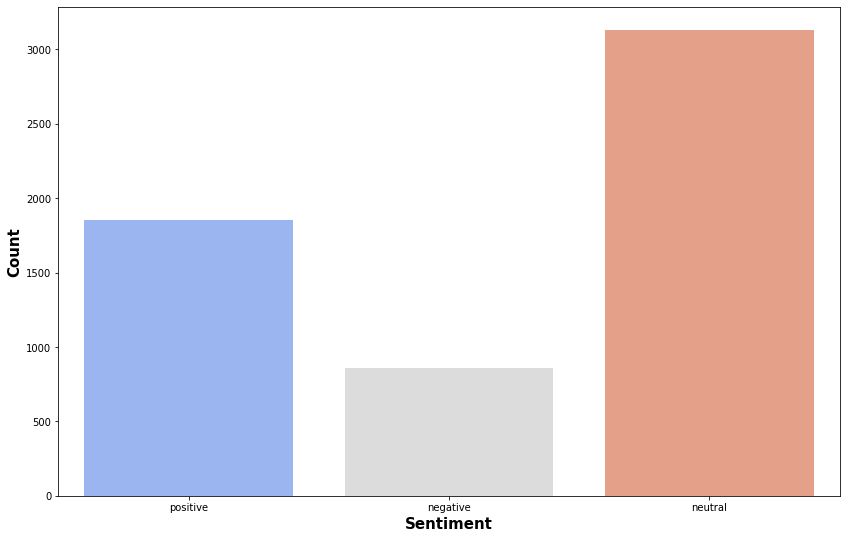

In [10]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.show()

# Apply encoding into Sentiments column

In [11]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Sentiment")
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


# Word cloud of Sentence Text

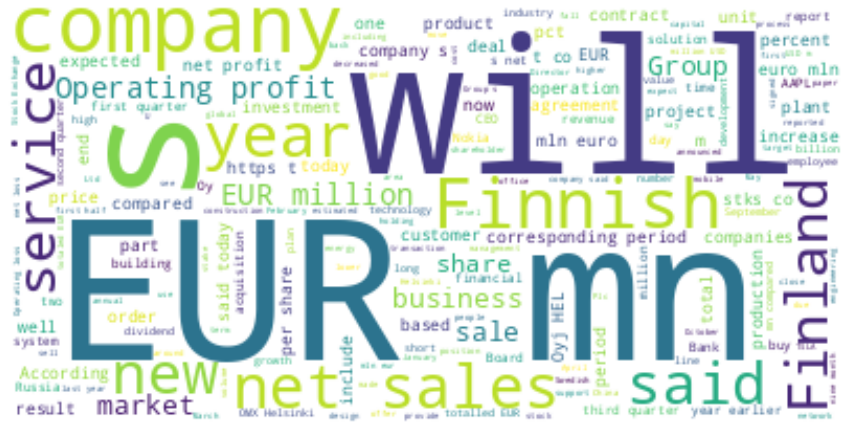

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cleaning the Sentence

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Sentence'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
corpus[0:3]

['geosolut technolog leverag benefon gp solut provid locat base search technolog commun platform locat relev multimedia content new power commerci model',
 'esi low bk real possibl',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur']

# Creating the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the Naive Bayes model on the Training set

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[142  25  25]
 [289 211 143]
 [169  27 138]]


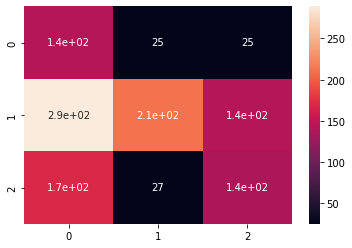

In [20]:
sns.heatmap(cm,annot =True)
plt.show()

In [21]:
acc1 = accuracy_score(y_test, y_pred)

In [22]:
print(f"Accuracy of Naive Bayes (Using Bag of words technique): {acc1}")

Accuracy of Naive Bayes (Using Bag of words technique): 0.42001710863986313


# Using TF - IDF Method.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [24]:
y=data['Sentiment']

# Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4381, 5000)
(1461, 5000)
(4381,)
(1461,)


In [27]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names())

In [28]:
count_df

,aapl,aapl http,aapl http co,ab,ab inbev,ab sto,abb,abl,abp,abp hel,...,yhoo,yhtyma,yhtyma oyj,yhtyma oyj hel,yit,yit corpor,york,zinc,znga,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naive Bayes (in TF - IDF)

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)
GaussianNB()
y1_pred = classifier.predict(X1_test)

In [30]:
acc2 = accuracy_score(y1_test, y1_pred)

In [31]:
print(f"Accuracy of Naive Bayes (Using TF - IDF technique): {acc2}")

Accuracy of Naive Bayes (Using TF - IDF technique): 0.5400410677618069


# MultinomialNB Algorithm

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
score = accuracy_score(y1_test, pred)

In [33]:
score

0.6721423682409309

# Training XGBoost on the Training set

In [34]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 30 130  32]
 [ 51 550  42]
 [ 10 110 214]]


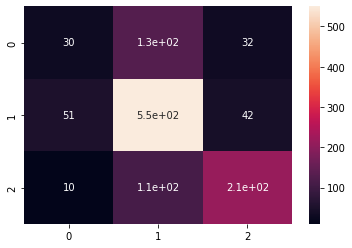

In [36]:
sns.heatmap(cm,annot=True)
plt.show()

In [37]:
acc3 = accuracy_score(y_test, y_pred)
print(acc3)

0.679213002566296


# Training CatBoost on the Training set

In [38]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.0856
0:	learn: 1.0744115	total: 64.4ms	remaining: 1m 4s
1:	learn: 1.0542612	total: 74.7ms	remaining: 37.3s
2:	learn: 1.0334723	total: 85.6ms	remaining: 28.4s
3:	learn: 1.0197677	total: 96.2ms	remaining: 24s
4:	learn: 1.0055921	total: 107ms	remaining: 21.2s
5:	learn: 0.9939193	total: 117ms	remaining: 19.4s
6:	learn: 0.9835225	total: 127ms	remaining: 18s
7:	learn: 0.9734878	total: 138ms	remaining: 17.1s
8:	learn: 0.9654381	total: 148ms	remaining: 16.3s
9:	learn: 0.9573342	total: 158ms	remaining: 15.6s
10:	learn: 0.9512071	total: 168ms	remaining: 15.1s
11:	learn: 0.9457943	total: 179ms	remaining: 14.7s
12:	learn: 0.9388886	total: 192ms	remaining: 14.6s
13:	learn: 0.9343741	total: 203ms	remaining: 14.3s
14:	learn: 0.9314254	total: 213ms	remaining: 14s
15:	learn: 0.9256993	total: 223ms	remaining: 13.7s
16:	learn: 0.9215086	total: 234ms	remaining: 13.5s
17:	learn: 0.9178308	total: 245ms	remaining: 13.4s
18:	learn: 0.9141908	total: 255ms	remaining: 13.2s
19:	learn: 0.90

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 34 123  35]
 [ 44 552  47]
 [  6 109 219]]


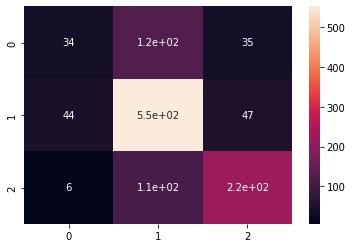

In [40]:
sns.heatmap(cm,annot=True)
plt.show()

In [41]:
acc4 = accuracy_score(y_test, y_pred)
print(acc4)

0.688622754491018


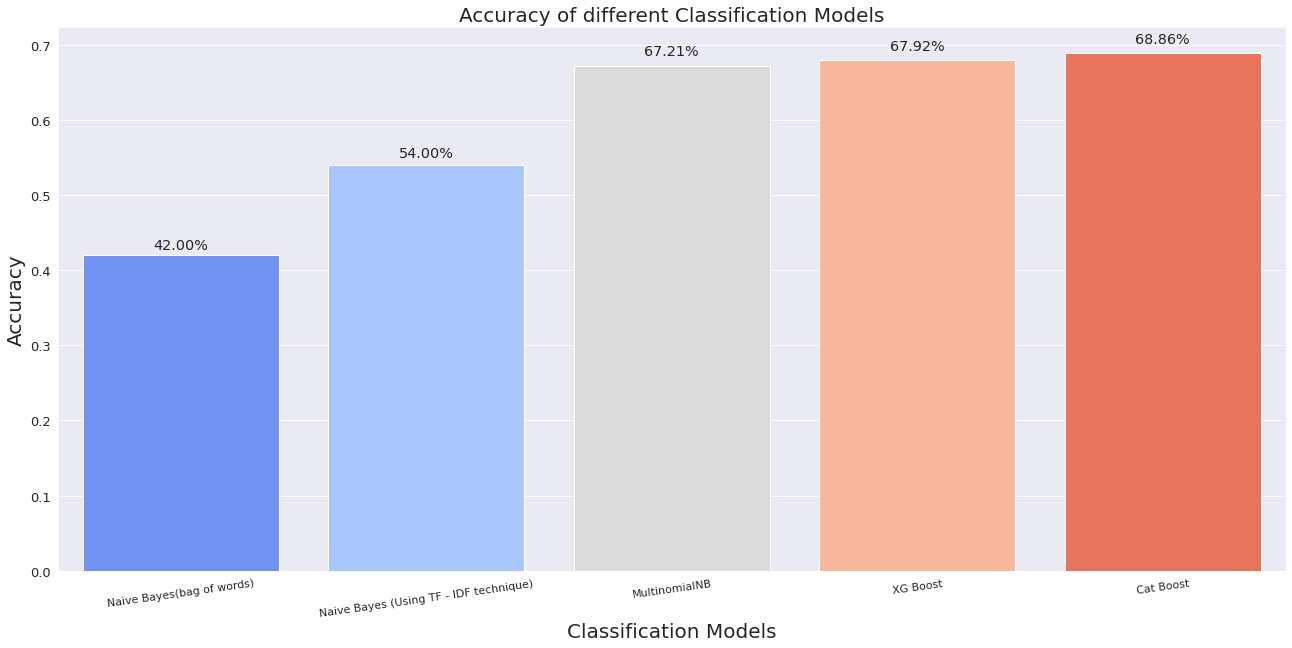

In [42]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Naive Bayes(bag of words)")
mylist.append(acc2)
mylist2.append("Naive Bayes (Using TF - IDF technique)")
mylist.append(score)
mylist2.append("MultinomialNB")
mylist.append(acc3)
mylist2.append("XG Boost")
mylist.append(acc4)
mylist2.append("Cat Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

![](https://www.blennz.school.nz/wp-content/uploads/2017/12/Thank-you-word-cloud-in-different-languages.png)